In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('Train_BigMartSales.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.10,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


In [3]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066164,140.992878,1997.831867,2181.289052
std,4.643456,0.051641,62.275160,8.371760,1706.499641
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.030000,93.825000,1987.000000,834.245000
50%,12.600000,0.050000,143.010000,1999.000000,1794.330000
75%,16.850000,0.090000,185.645000,2004.000000,3101.300000
max,21.350000,0.330000,266.890000,2009.000000,13086.960000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Pre-processing

In [5]:
## Remove unnecessary variables
train.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.02,Dairy,249.81,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,5.92,Regular,0.02,Soft Drinks,48.27,2009,Medium,Tier 3,Supermarket Type2,443.42
2,17.50,Low Fat,0.02,Meat,141.62,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,19.20,Regular,0.00,Fruits and Vegetables,182.10,1998,NaN,Tier 3,Grocery Store,732.38
4,8.93,Low Fat,0.00,Household,53.86,1987,High,Tier 3,Supermarket Type1,994.71


In [6]:
## Deal with Missing values

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(train) ## Pass your dataset name

Your selected dataframe has 10 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Outlet_Size,2410,28.3
Item_Weight,1463,17.2


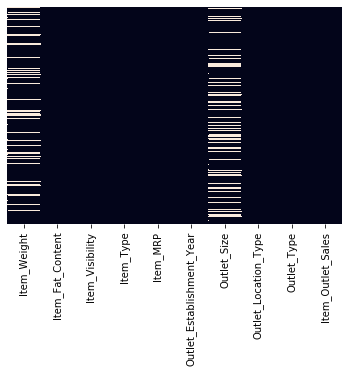

In [7]:
missingdata=train.isnull()
sns.heatmap(missingdata,yticklabels=False,cbar=False)

In [8]:
# Delete the columns with > 50% missing
missing_df = missing_values_table(train);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index) ## Change 50 to any number you want


print('We will remove %d columns.' % len(missing_columns))
print(missing_columns)

Your selected dataframe has 10 columns.
There are 2 columns that have missing values.
We will remove 0 columns.
[]


In [9]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0.00,np.mean(train['Item_Visibility'])) ## Replace 0 with mean
train['Outlet_Establishment_Year'] = 2019 - train['Outlet_Establishment_Year'] ## convert year into numbers


train['Outlet_Size'].fillna('Medium',inplace=True) ## replace NAN with Medium
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True) ## replace NAN with Mean of the Item Weight



missing_values_table(train) ## Double Check

Your selected dataframe has 10 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [10]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.020000,Dairy,249.81,20,Medium,Tier 1,Supermarket Type1,3735.14
1,5.92,Regular,0.020000,Soft Drinks,48.27,10,Medium,Tier 3,Supermarket Type2,443.42
2,17.50,Low Fat,0.020000,Meat,141.62,20,Medium,Tier 1,Supermarket Type1,2097.27
3,19.20,Regular,0.066164,Fruits and Vegetables,182.10,21,Medium,Tier 3,Grocery Store,732.38
4,8.93,Low Fat,0.066164,Household,53.86,32,High,Tier 3,Supermarket Type1,994.71


In [11]:
## Select non numerical categorical column names
mylist = list(train.select_dtypes(include=['object']).columns)
mylist

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
## Create dummy variables for non numerical categorical variables
dummies = pd.get_dummies(train[mylist], prefix= mylist)
dummies.head()

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [13]:
train.drop(mylist, axis=1, inplace = True) ## Drop Non numerical categorical columns
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.020000,249.81,20,3735.14
1,5.92,0.020000,48.27,10,443.42
2,17.50,0.020000,141.62,20,2097.27
3,19.20,0.066164,182.10,21,732.38
4,8.93,0.066164,53.86,32,994.71


In [14]:
train=pd.concat([train,dummies], axis =1 ) ## added encoded categorical columns
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.020000,249.81,20,3735.14,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.020000,48.27,10,443.42,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.020000,141.62,20,2097.27,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.066164,182.10,21,732.38,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.066164,53.86,32,994.71,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 36 columns):
Item_Weight                        8523 non-null float64
Item_Visibility                    8523 non-null float64
Item_MRP                           8523 non-null float64
Outlet_Establishment_Year          8523 non-null int64
Item_Outlet_Sales                  8523 non-null float64
Item_Fat_Content_LF                8523 non-null uint8
Item_Fat_Content_Low Fat           8523 non-null uint8
Item_Fat_Content_Regular           8523 non-null uint8
Item_Fat_Content_low fat           8523 non-null uint8
Item_Fat_Content_reg               8523 non-null uint8
Item_Type_Baking Goods             8523 non-null uint8
Item_Type_Breads                   8523 non-null uint8
Item_Type_Breakfast                8523 non-null uint8
Item_Type_Canned                   8523 non-null uint8
Item_Type_Dairy                    8523 non-null uint8
Item_Type_Frozen Foods             8523 non-null uint8
Item_

In [16]:
X = train.drop('Item_Outlet_Sales',1) ## This is the dependent variable
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.020000,249.81,20,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.020000,48.27,10,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.020000,141.62,20,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.066164,182.10,21,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.066164,53.86,32,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] ## Replace X with your indepedent data type
vif_s =pd.Series(vif, index =X.columns)
print(vif_s)

C:\Users\smukhopadhyay\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Item_Weight                         1.014694
Item_Visibility                     1.111746
Item_MRP                            1.013586
Outlet_Establishment_Year          49.044114
Item_Fat_Content_LF                      inf
Item_Fat_Content_Low Fat                 inf
Item_Fat_Content_Regular                 inf
Item_Fat_Content_low fat                 inf
Item_Fat_Content_reg                     inf
Item_Type_Baking Goods                   inf
Item_Type_Breads                         inf
Item_Type_Breakfast                      inf
Item_Type_Canned                         inf
Item_Type_Dairy                          inf
Item_Type_Frozen Foods                   inf
Item_Type_Fruits and Vegetables          inf
Item_Type_Hard Drinks                    inf
Item_Type_Health and Hygiene             inf
Item_Type_Household                      inf
Item_Type_Meat                           inf
Item_Type_Others                         inf
Item_Type_Seafood                        inf
Item_Type_

In [18]:
y=train.Item_Outlet_Sales
## Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

# Importing tpot (Pipeline for: Feature Selection, Model Selection, Hyper parameter Tuning)

In [19]:
from tpot import TPOTRegressor

In [25]:
tpot=TPOTRegressor(generations=5,population_size=50,verbosity=2) ## play with this parameter. 

In [26]:
tpot.fit(X_train,y_train)

A Jupyter Widget


Generation 1 - Current best internal CV score: -1165645.6415469924
Generation 2 - Current best internal CV score: -1163510.1377755464
Generation 3 - Current best internal CV score: -1153776.3762558002
Generation 4 - Current best internal CV score: -1153776.3762558002
Generation 5 - Current best internal CV score: -1153776.3762558002
Best pipeline: LassoLarsCV(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), normalize=True)


TPOTRegressor(generations=5,
              log_file=<ipykernel.iostream.OutStream object at 0x00000000054DC630>,
              population_size=50, verbosity=2)

In [22]:
tpot.export('pipeline.py')

In [23]:
print(tpot.score(X_test,y_test))

-1161243.8272748878
